              Sl_No  Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
cluster                                                                        
0        117.857143      12174.107143            2.410714           0.933036   
1        439.747706      46082.568807            5.885321           3.158257   

         Total_visits_online  Total_calls_made  
cluster                                         
0                   3.553571          6.870536  
1                   2.119266          1.894495  


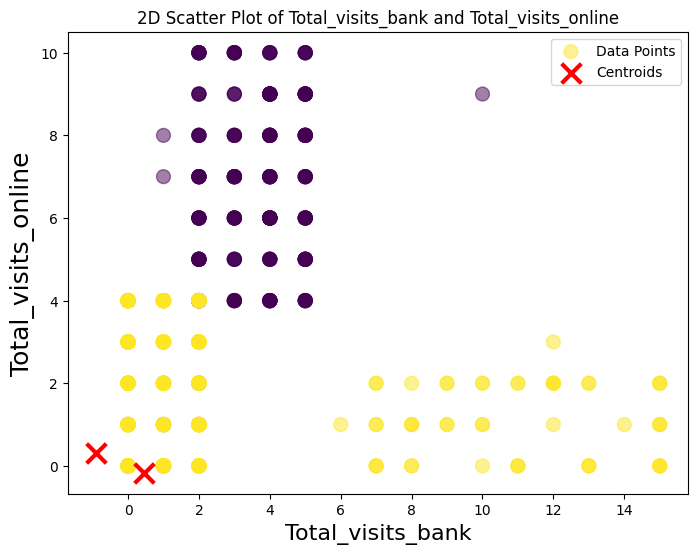

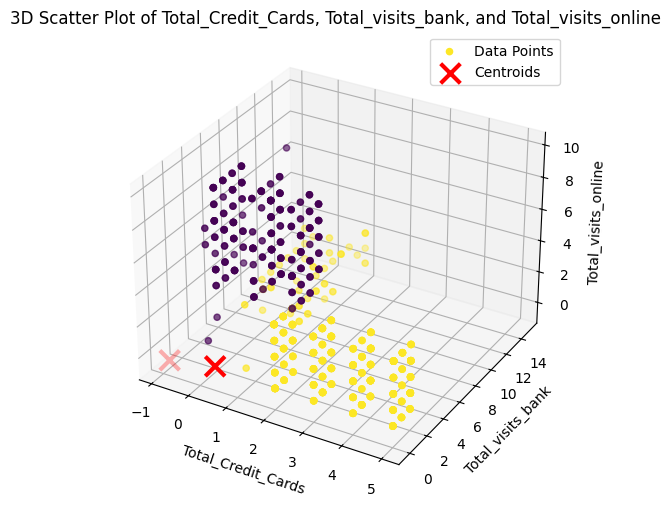

In [11]:
# pandas, numpy, va sklearn kutubxonalarni chaqirish
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Ma'lumotlarni yuklash

df = pd.read_csv("dataset.csv")


# 'Customer Key' ustundagi amalni o'chirish
df.drop('Customer Key', axis=1, inplace=True)

# X xususiyatlarni ajratib olish
X = df.values[:, 1:]
X = np.nan_to_num(X)
norm_data = StandardScaler().fit_transform(X)

# k-means klastirizatsiyasini qo'llash
k = 2
k_means = KMeans(n_clusters=k, n_init=20)
k_means.fit(norm_data)

# Klastirlash natijalarini DataFrame ga qo'shish
df['cluster'] = k_means.labels_

# Klastirlash natijalari bo'yicha o'rtacha qiymatlar
print(df.groupby('cluster').mean())

# 2D nuqta chizish
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 3], X[:, 4], s=100, c=k_means.labels_.astype(float), alpha=0.5, label='Data Points')
plt.scatter(k_means.cluster_centers_[:, 2], k_means.cluster_centers_[:, 3],
            marker='x', s=200, linewidths=3, color='red', label="Centroids")
plt.xlabel('Total_visits_bank', fontsize=16)
plt.ylabel('Total_visits_online', fontsize=18)
plt.legend()
plt.title("2D Scatter Plot of Total_visits_bank and Total_visits_online")
plt.show()

# 3D nuqta chizish
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X[:, 2], X[:, 3], X[:, 4], c=k_means.labels_.astype(float), label='Data Points')
ax.scatter(k_means.cluster_centers_[:, 2], k_means.cluster_centers_[:, 3], k_means.cluster_centers_[:, 0],
           marker='x', s=200, linewidths=3, color='red', label="Centroids")
ax.set_xlabel('Total_Credit_Cards')
ax.set_ylabel('Total_visits_bank')
ax.set_zlabel('Total_visits_online')
ax.legend()
plt.title("3D Scatter Plot of Total_Credit_Cards, Total_visits_bank, and Total_visits_online")
plt.show()
